In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [54]:
import pandas as pd
import seaborn as sns

In [55]:
from sklearn.svm import OneClassSVM
from sklearn import svm

In [56]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
import matplotlib.pyplot as plt

In [57]:
import plotly.express as px

Detection by means of Retention Times

In [58]:
# Assuming you have means (mus) and standard deviations (sigmas) for 6 Gaussian distributions
mus = [72.16, 139.61, 153.00, 170.83, 183.19, 202.94]
sigmas = [0.74, 0.82, 2.84, 3.35, 4.29, 1.60]

In [59]:
# Generate a range of x values in order to create a gaussian curve
x_values = np.linspace(min(mus) - 3 * max(sigmas), max(mus) + 3 * max(sigmas), 1000)

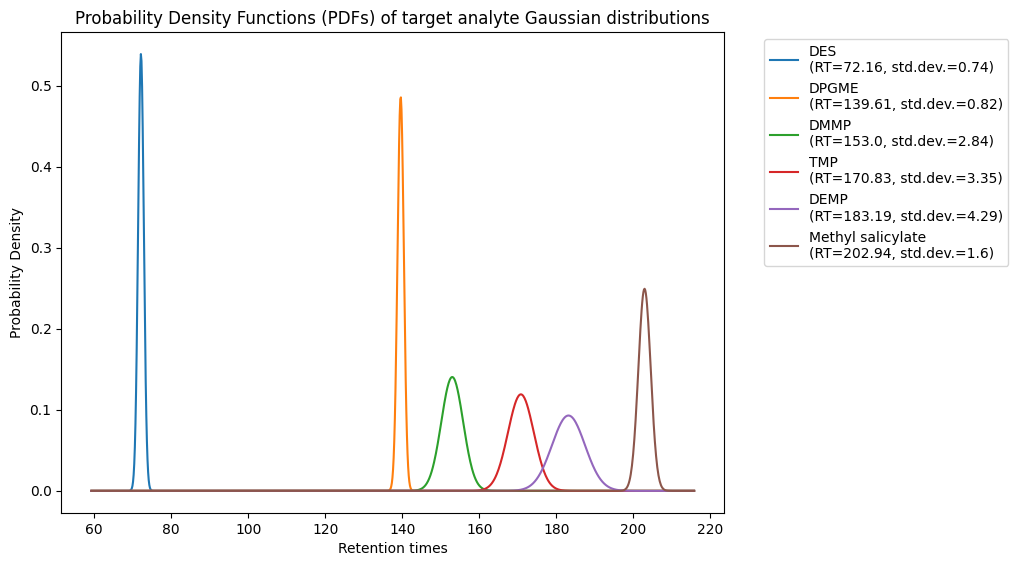

In [60]:
# List of curve names corresponding to each distribution
curve_names = ['DES', 'DPGME', 'DMMP', 'TMP', 'DEMP', 'Methyl salicylate']

# Plot Gaussian distributions with curve names
for mu, sigma, curve_name in zip(mus, sigmas, curve_names):
    pdf_values = norm.pdf(x_values, mu, sigma)
    label = f'{curve_name}\n(RT={mu}, std.dev.={sigma})'
    plt.plot(x_values, pdf_values, label=label)

plt.title('Probability Density Functions (PDFs) of target analyte Gaussian distributions')
plt.xlabel('Retention times')
plt.ylabel('Probability Density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()  # Adjust layout to prevent clipping

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(15, 6)  # Adjust the dimensions (width, height) as needed

plt.show()

Overlap Area: 0.1047030541754658


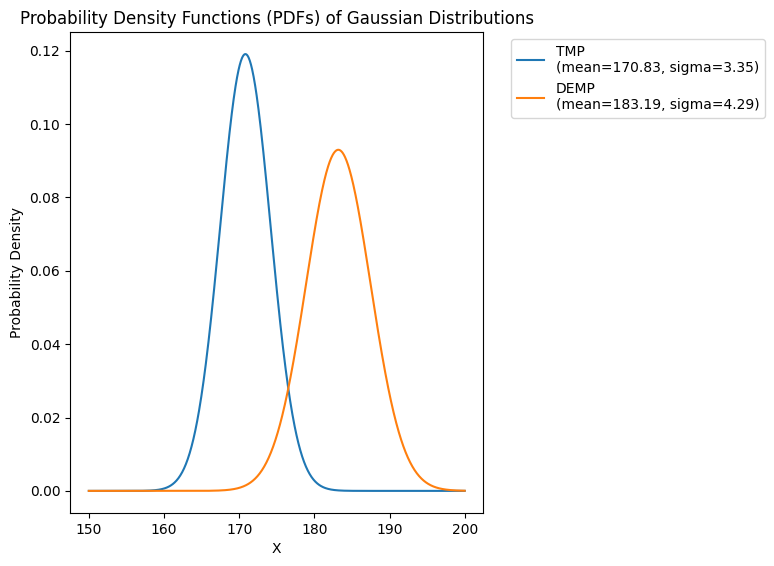

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the parameters for the Gaussian distributions
mus = [170.83, 183.19]
sigmas = [3.35, 4.29]

# Generate x values for plotting
x_values = np.linspace(150, 200, 1000)

# Plot the Gaussian distributions
curve_names = ['TMP', 'DEMP']
for mu, sigma, curve_name in zip(mus, sigmas, curve_names):
    pdf_values = norm.pdf(x_values, mu, sigma)
    label = f'{curve_name}\n(mean={mu}, sigma={sigma})'
    plt.plot(x_values, pdf_values, label=label)

# Calculate the overlap area
overlap_area = np.trapz(np.minimum(norm.pdf(x_values, mus[0], sigmas[0]), 
                                    norm.pdf(x_values, mus[1], sigmas[1])), x_values)
print("Overlap Area:", overlap_area)

plt.title('Probability Density Functions (PDFs) of Gaussian Distributions')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(10, 6)

plt.show()


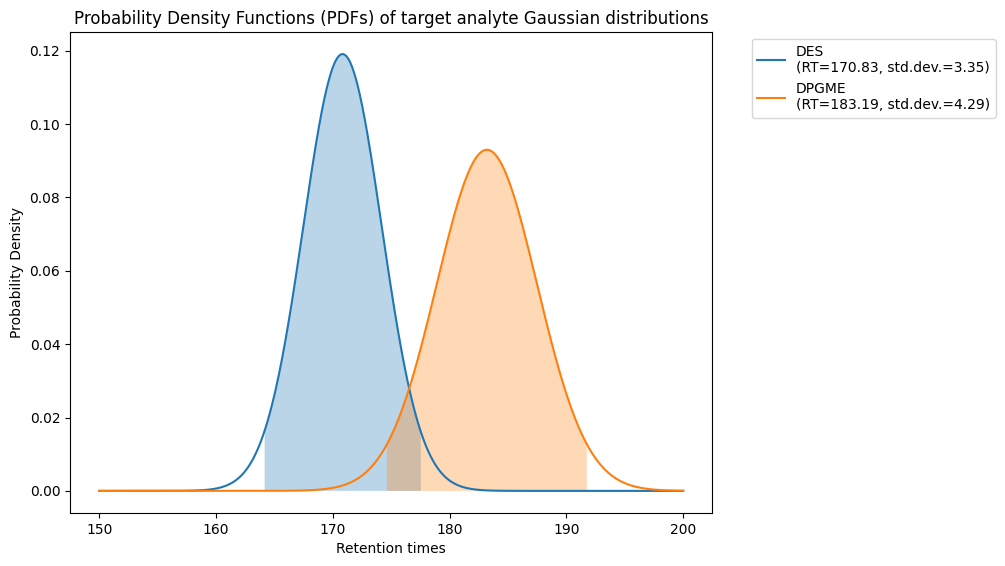

In [62]:
# List of curve names corresponding to each distribution
curve_names = ['DES', 'DPGME', 'DMMP', 'TMP', 'DEMP', 'Methyl salicylate']

# Plot Gaussian distributions with shaded regions for ±2 std deviation
for mu, sigma, curve_name in zip(mus, sigmas, curve_names):
    pdf_values = norm.pdf(x_values, mu, sigma)
    label = f'{curve_name}\n(RT={mu}, std.dev.={sigma})'
    plt.plot(x_values, pdf_values, label=label)

    # Shade ±2 std deviation region
    lower_bound = mu - 2 * sigma
    upper_bound = mu + 2 * sigma
    plt.fill_between(x_values, 0, pdf_values, where=((x_values >= lower_bound) & (x_values <= upper_bound)), alpha=0.3)

plt.title('Probability Density Functions (PDFs) of target analyte Gaussian distributions')
plt.xlabel('Retention times')
plt.ylabel('Probability Density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()  # Adjust layout to prevent clipping

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(15, 6)  # Adjust the dimensions (width, height) as needed

plt.show()

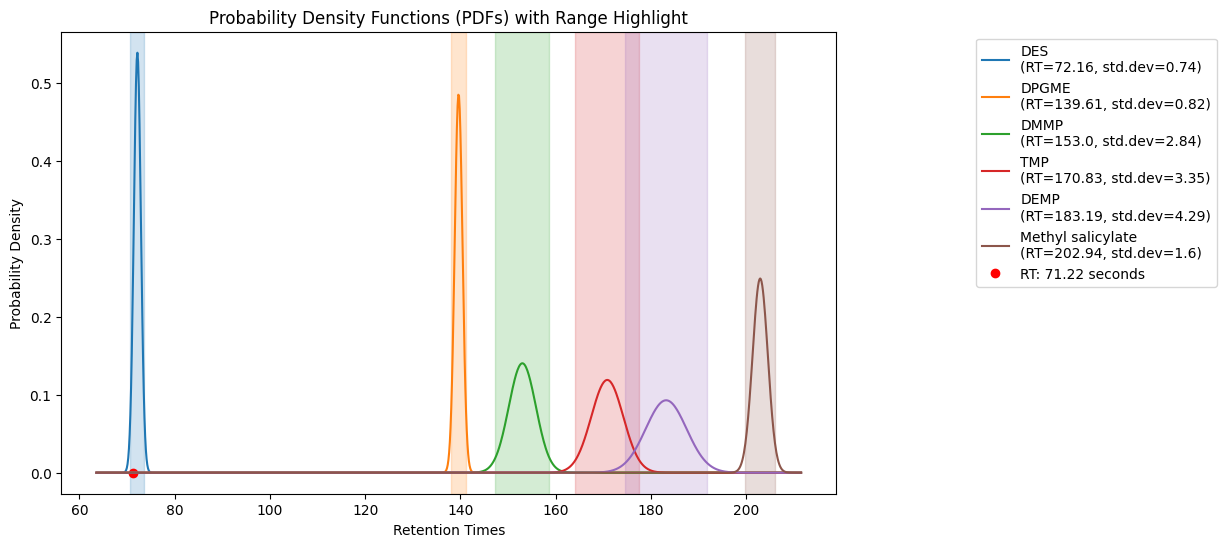

Point x0 = 71.22 seconds falls within the range of DES.


In [63]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Given means (mus) and standard deviations (sigmas) for 6 Gaussian distributions
mus = [72.16, 139.61, 153.00, 170.83, 183.19, 202.94]
sigmas = [0.74, 0.82, 2.84, 3.35, 4.29, 1.60]
curve_names = ['DES', 'DPGME', 'DMMP', 'TMP', 'DEMP', 'Methyl salicylate']

# Generate a range of x values
x_values = np.linspace(min(mus) - 2 * max(sigmas), max(mus) + 2 * max(sigmas), 1000)

# Set figure size
plt.figure(figsize=(10, 6))

# Plot the Gaussian distributions and highlight the range around the mean
handles = []  # List to store legend handles
for i, (mu, sigma) in enumerate(zip(mus, sigmas)):
    pdf_values = norm.pdf(x_values, mu, sigma)
    label_text = f'{curve_names[i]}\n(RT={mu}, std.dev={sigma})'  # Custom label using curve_names
    line, = plt.plot(x_values, pdf_values, label=label_text)
    handles.append(line)  # Add line to handles for legend

    # Highlight the ±2 std deviation range around the mean
    lower_bound = mu - 2 * sigma
    upper_bound = mu + 2 * sigma
    plt.axvspan(lower_bound, upper_bound, alpha=0.2, color=f'C{i}')

# Define the range for classification
classification_ranges = [(mu - 2 * sigma, mu + 2 * sigma) for mu, sigma in zip(mus, sigmas)]

# Plot the data point x0 and classify it based on range
x0 = 71.22
classified = False
detected_curve = None

for i, (lower_bound, upper_bound) in enumerate(classification_ranges):
    if lower_bound <= x0 <= upper_bound:
        detected_curve = curve_names[i]
        plt.scatter(x0, 0, color='red', marker='o', label=f'RT: {x0} seconds ({detected_curve} detected)')
        classified = True
        break  # Stop after classifying x0 in the first valid range

if not classified:
    plt.scatter(x0, 0, color='red', marker='o', label=f'RT: {x0} seconds (Out of Range)')

# Create custom legend without "Range Factor" labels
plt.legend(handles=handles + [plt.Line2D([], [], linestyle='None', color='red', marker='o')], 
           labels=[handle.get_label() for handle in handles] + [f'RT: {x0} seconds'], 
           loc='upper right', bbox_to_anchor=(1.5, 1))

plt.title('Probability Density Functions (PDFs) with Range Highlight')
plt.xlabel('Retention Times')
plt.ylabel('Probability Density')
plt.show()

if classified:
    print(f"Point x0 = {x0} seconds falls within the range of {detected_curve}.")
else:
    print(f"Point x0 = {x0} seconds falls outside of all ranges.")


One Class Support Vector Machines

In [64]:
data_QEPAS = pd.read_excel("spectra_QEPAS.xlsx", sheet_name='Sheet1', index_col=0, header=0)
data_QEPAS.head()

,Substance,8,8.0126,8.0253,8.038,8.0507,8.0635,8.0763,8.0892,8.1021,...,9.8259,9.845,9.8641,9.8833,9.9025,9.9219,9.9413,9.9608,9.9804,10
Samples,,,,,,,,,,,,,,,,,,,,,
1,DMMP,271.9961,223.3692,197.8315,182.8558,174.8573,173.6169,178.7678,177.5523,184.5932,...,311.8415,255.5320,208.6131,173.2324,139.4977,113.0400,90.8546,66.8731,37.1438,8.1717
2,DMMP,389.2788,335.3702,301.9533,281.3166,268.4817,263.9257,266.3711,279.7354,292.3957,...,408.5450,336.9116,281.9241,233.6499,191.4779,162.6930,128.8867,90.7564,51.1400,9.2612
3,DMMP,793.5299,690.9891,626.0325,589.4253,570.6957,550.9537,544.1378,549.3250,566.3320,...,679.0974,571.2848,481.9123,413.2983,353.2528,295.2773,236.6444,173.5516,100.1268,20.1568
4,DMMP,263.2623,218.9398,188.7208,169.4598,159.0238,155.4152,151.7033,159.4347,172.7793,...,204.8158,162.7592,129.3724,103.7256,83.8047,66.5562,55.9918,38.2132,23.1476,1.6343
5,DMMP,123.5212,93.6505,81.3452,83.0554,85.3634,89.6087,101.1356,109.4302,119.6164,...,148.8581,113.3889,90.0217,74.3188,66.8316,61.2740,52.8224,39.8054,29.0691,9.8060


In [65]:
X_QEPAS = data_QEPAS.iloc[176:200,1:]
X_QEPAS

,8.0000,8.0126,8.0253,8.0380,8.0507,8.0635,8.0763,8.0892,8.1021,8.1150,...,9.8259,9.8450,9.8641,9.8833,9.9025,9.9219,9.9413,9.9608,9.9804,10.0000
Samples,,,,,,,,,,,,,,,,,,,,,
177,1359.9805,1021.2971,756.8355,550.5768,391.0195,269.5263,176.6311,107.9808,62.0233,28.0260,...,-54.8711,-49.9128,-51.7490,-57.2095,-56.7538,-51.7660,-50.7095,-45.1128,-26.3775,-12.5299
178,3347.5484,2652.5884,2098.7056,1650.3908,1273.5669,964.6941,729.3156,540.6286,394.2911,281.0174,...,-52.1547,-49.3703,-45.8194,-48.6548,-49.3281,-55.4635,-60.2176,-58.9120,-43.0653,-16.3434
179,2003.1640,1537.6407,1170.7198,870.7419,631.9646,432.6422,283.4644,166.6817,84.1745,27.2685,...,-4.3462,0.5425,3.2343,-2.6733,-6.8953,-21.1290,-42.2579,-72.1805,-86.1306,-19.0672
180,4550.9440,3642.8796,2922.5695,2328.2299,1840.8205,1422.5387,1089.7000,823.9876,616.5414,457.5055,...,-86.9245,-87.8900,-90.5607,-90.3589,-94.4129,-97.7215,-99.8344,-86.5105,-56.5232,-14.7090
181,1693.7372,1262.3840,927.3350,655.7356,440.5853,270.9264,148.1422,54.3527,-2.9535,-44.6901,...,-41.2891,-41.7749,-43.6632,-45.4468,-45.6152,-48.0684,-42.7862,-36.0903,-26.3775,-9.2612
182,3247.7333,2551.3445,1999.1391,1545.2320,1165.4858,856.1835,616.0722,424.6761,282.7968,179.5179,...,-61.9337,-61.8485,-64.1472,-71.1108,-74.2573,-79.7618,-88.2134,-79.6108,-50.0634,-19.0672
183,4280.8195,3418.2448,2729.9442,2158.1003,1670.0937,1253.1222,930.8744,675.4234,476.2505,327.2225,...,42.9190,41.7749,39.8898,33.1494,23.8684,5.8105,-24.8265,-63.1579,-79.6708,-24.5150
184,3532.2063,2779.1431,2178.7492,1676.5131,1259.1102,910.0887,636.0144,426.1255,260.6456,141.6449,...,-82.0350,-83.0072,-80.3187,-83.9429,-87.5176,-90.8546,-105.6448,-109.8630,-82.3624,-21.7911
185,3895.2837,3082.8746,2434.4985,1889.5099,1438.0980,1057.1031,755.6678,522.5110,342.6050,202.9991,...,-85.8379,-84.0923,-80.8578,-81.2695,-80.0918,-83.9876,-85.0441,-81.7338,-54.3699,-8.7165


In [66]:
def snv_QEPAS(X_QEPAS, mean_QEPAS=None, std_dev_QEPAS=None):
    if mean_QEPAS is None:
        mean_QEPAS = np.mean(X_QEPAS, axis=1, keepdims=True)
    if std_dev_QEPAS is None:
        std_dev_QEPAS = np.std(X_QEPAS, axis=1, keepdims=True)

    # Apply correction
    output_data_QEPAS = (X_QEPAS - mean_QEPAS) / std_dev_QEPAS

    return output_data_QEPAS

In [67]:
# Compute the SNV on IMS raw data
X_snv_QEPAS = snv_QEPAS(X_QEPAS.values)
X_snv_QEPAS

array([[ 7.44826242,  5.58010295,  4.12134695, ..., -0.30215686,
        -0.19881395, -0.12243133],
       [ 6.94170932,  5.45180151,  4.26434566, ..., -0.36131816,
        -0.3273448 , -0.27005637],
       [ 6.89626003,  5.2445481 ,  3.94268495, ..., -0.46721947,
        -0.51671548, -0.27876945],
       ...,
       [ 0.29909922,  0.55170272,  0.97326911, ..., -0.23129026,
        -0.20743635, -0.1483105 ],
       [ 0.14629381,  0.39001723,  0.78762759, ..., -0.34830172,
        -0.32809279, -0.27851024],
       [ 0.12564589,  0.41678245,  0.85800302, ..., -0.30788643,
        -0.39273776, -0.46843966]])

In [68]:
# Create a new DataFrame with the processed QEPAS numerical attributes
processed_dataframe_QEPAS = pd.DataFrame(X_snv_QEPAS, columns=data_QEPAS.columns[1:])
processed_dataframe_QEPAS

,8.0000,8.0126,8.0253,8.0380,8.0507,8.0635,8.0763,8.0892,8.1021,8.1150,...,9.8259,9.8450,9.8641,9.8833,9.9025,9.9219,9.9413,9.9608,9.9804,10.0000
0,7.448262,5.580103,4.121347,2.983635,2.103526,1.433376,0.920971,0.542299,0.288800,0.101273,...,-0.355983,-0.328633,-0.338762,-0.368882,-0.366368,-0.338856,-0.333028,-0.302157,-0.198814,-0.122431
1,6.941709,5.451802,4.264346,3.303214,2.495351,1.833166,1.328544,0.924022,0.610293,0.367448,...,-0.346831,-0.340862,-0.333249,-0.339328,-0.340771,-0.353925,-0.364117,-0.361318,-0.327345,-0.270056
2,6.896260,5.244548,3.942685,2.878341,2.031141,1.323930,0.794636,0.380282,0.087540,-0.114367,...,-0.226538,-0.209193,-0.199642,-0.220603,-0.235583,-0.286085,-0.361052,-0.467219,-0.516715,-0.278769
3,6.745616,5.353920,4.249975,3.339092,2.592090,1.951033,1.440925,1.033695,0.715764,0.472026,...,-0.362366,-0.363845,-0.367939,-0.367629,-0.373842,-0.378913,-0.382151,-0.361731,-0.315773,-0.251689
4,7.554983,5.655516,4.180125,2.984134,2.036718,1.289624,0.748943,0.335940,0.083592,-0.100196,...,-0.085220,-0.087359,-0.095674,-0.103528,-0.104270,-0.115072,-0.091812,-0.062327,-0.019556,0.055816
5,7.019119,5.474782,4.250191,3.243591,2.401452,1.715532,1.183052,0.758606,0.443969,0.214934,...,-0.320518,-0.320329,-0.325427,-0.340869,-0.347847,-0.360054,-0.378797,-0.359719,-0.294194,-0.225455
6,6.550120,5.163331,4.056729,3.137358,2.352775,1.682397,1.164309,0.753613,0.433396,0.193799,...,-0.263284,-0.265124,-0.268155,-0.278991,-0.293913,-0.322945,-0.372201,-0.433828,-0.460376,-0.371700
7,6.952219,5.432109,4.220173,3.206375,2.363818,1.659294,1.106056,0.682381,0.348348,0.108137,...,-0.343376,-0.345339,-0.339912,-0.347227,-0.354443,-0.361179,-0.391034,-0.399549,-0.344037,-0.221770
8,6.946246,5.461359,4.276285,3.280178,2.455106,1.758740,1.207789,0.781635,0.452811,0.197645,...,-0.330279,-0.327088,-0.321177,-0.321929,-0.319777,-0.326897,-0.328828,-0.322778,-0.272763,-0.189320
9,7.119074,5.517995,4.209260,3.132010,2.243955,1.518692,0.953175,0.520456,0.198185,-0.015453,...,-0.282372,-0.289014,-0.298761,-0.313450,-0.327924,-0.344435,-0.352489,-0.349644,-0.276603,-0.144441


In [69]:
#wavelenghts for plots (variables)
# Your string with numbers separated by spaces
numbers_string = "8 8,0126	8,0253 8,038	8,0507	8,0635	8,0763	8,0892	8,1021	8,115	8,128	8,141	8,1541	8,1672	8,1804	8,1935	8,2068	8,2201	8,2334	8,2468	8,2602	8,2736	8,2871	8,3007	8,3142	8,3279	8,3415	8,3553	8,369	8,3828	8,3967	8,4106	8,4245	8,4385	8,4526	8,4667	8,4808	8,495	8,5092	8,5235	8,5378	8,5522	8,5666	8,5811	8,5956	8,6102	8,6248	8,6395	8,6542	8,6689	8,6838	8,6986	8,7136	8,7285	8,7435	8,7586	8,7737	8,7889	8,8042	8,8194	8,8348	8,8502	8,8656	8,8811	8,8967	8,9123	8,9279	8,9437	8,9594	8,9753	8,9912	9,0071	9,0231	9,0391	9,0553	9,0714	9,0877	9,1039	9,1203	9,1367	9,1532	9,1697	9,1863	9,2029	9,2196	9,2364	9,2532	9,2701	9,287	9,304	9,3211	9,3382	9,3554	9,3727	9,39	9,4074	9,4249	9,4424	9,46	9,4776	9,4953	9,5131	9,531	9,5489	9,5669	9,5849	9,603	9,6212	9,6395	9,6578	9,6762	9,6947	9,7132	9,7318	9,7505	9,7692	9,7881	9,8069	9,8259	9,845	9,8641	9,8833	9,9025	9,9219	9,9413	9,9608	9,9804	10"

# Replace commas with points and join the numbers with a space
wl = np.array(list(map(lambda x: float(x.replace(',', '.')), numbers_string.split())))

# Print or use the result_string as needed
print(wl)

[ 8.      8.0126  8.0253  8.038   8.0507  8.0635  8.0763  8.0892  8.1021
  8.115   8.128   8.141   8.1541  8.1672  8.1804  8.1935  8.2068  8.2201
  8.2334  8.2468  8.2602  8.2736  8.2871  8.3007  8.3142  8.3279  8.3415
  8.3553  8.369   8.3828  8.3967  8.4106  8.4245  8.4385  8.4526  8.4667
  8.4808  8.495   8.5092  8.5235  8.5378  8.5522  8.5666  8.5811  8.5956
  8.6102  8.6248  8.6395  8.6542  8.6689  8.6838  8.6986  8.7136  8.7285
  8.7435  8.7586  8.7737  8.7889  8.8042  8.8194  8.8348  8.8502  8.8656
  8.8811  8.8967  8.9123  8.9279  8.9437  8.9594  8.9753  8.9912  9.0071
  9.0231  9.0391  9.0553  9.0714  9.0877  9.1039  9.1203  9.1367  9.1532
  9.1697  9.1863  9.2029  9.2196  9.2364  9.2532  9.2701  9.287   9.304
  9.3211  9.3382  9.3554  9.3727  9.39    9.4074  9.4249  9.4424  9.46
  9.4776  9.4953  9.5131  9.531   9.5489  9.5669  9.5849  9.603   9.6212
  9.6395  9.6578  9.6762  9.6947  9.7132  9.7318  9.7505  9.7692  9.7881
  9.8069  9.8259  9.845   9.8641  9.8833  9.9025  9.92

Text(0.5, 1.0, 'SNV')

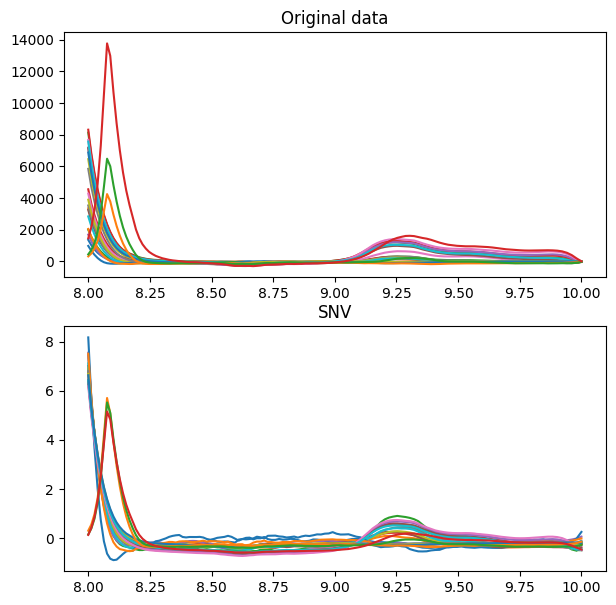

In [70]:
# Let's plot the different datasets we preprocessed
import matplotlib
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2,figsize=(7,7))
#fig, axs = plt.subplots(2, 2, figsize=(15,15))
ax1.plot(wl,  X_QEPAS.T)
ax1.set_title('Original data')
ax2.plot(wl,  X_snv_QEPAS.T)
ax2.set_title('SNV')


In [71]:
# Create a one-class SVM model
clf = svm.OneClassSVM(kernel="linear", gamma='scale')
clf.fit(X_snv_QEPAS)

OneClassSVM(kernel='linear')

In [72]:
y_pred_train = clf.predict(X_snv_QEPAS)
y_pred_train

array([-1,  1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1,
        1,  1,  1,  1, -1, -1, -1])

In [73]:
clf.score_samples(X_snv_QEPAS)

array([1195.65516415, 1247.0136249 , 1195.47378063, 1257.54476897,
       1195.1581177 , 1243.65381283, 1227.5263283 , 1240.1921167 ,
       1246.46285415, 1228.83248084,  980.75876554, 1167.65222653,
       1252.16447784, 1247.40489261, 1229.3841301 , 1247.61311254,
       1213.8687885 , 1247.87580705, 1248.11738292, 1253.69312947,
       1248.38953426,  711.6644645 ,  687.04876594,  704.35211456])

In [74]:
clf.decision_function(X_snv_QEPAS)

array([ -39.13296756,   12.22549319,  -39.31435108,   22.75663725,
        -39.63001401,    8.86568111,   -7.26180342,    5.40398498,
         11.67472244,   -5.95565088, -254.02936617,  -67.13590518,
         17.37634613,   12.61676089,   -5.40400162,   12.82498083,
        -20.91934322,   13.08767534,   13.3292512 ,   18.90499776,
         13.60140255, -523.12366721, -547.73936578, -530.43601715])

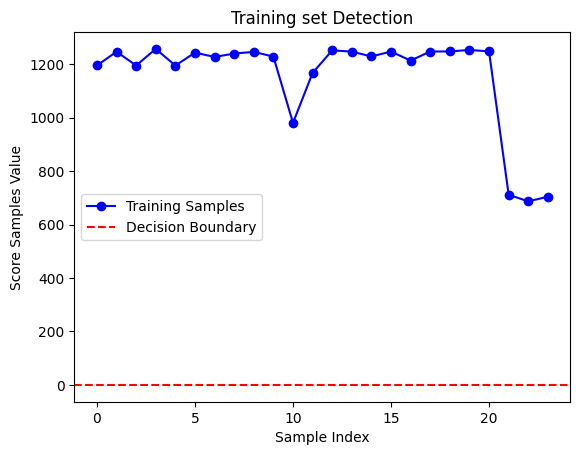

In [75]:
# Plotting score values
Z_train = clf.score_samples(X_snv_QEPAS)

plt.title("Training set Detection")
plt.plot(Z_train, marker='o', linestyle='-', color='b', label='Training Samples')

plt.xlabel("Sample Index")
plt.ylabel("Score Samples Value")
plt.axhline(y=0, color='r', linestyle='--', label='Decision Boundary')

plt.legend()
plt.show()

test the model


In [76]:
new_data_QEPAS = pd.read_excel("/Users/giorgiofelizzato/Desktop/RISEN project/Articles/submitted/GC-QEPAS Chemical Weapon (submitted forensic science research)/spettri_QEPAS.xlsx", sheet_name='Sheet1', index_col=0, header=0)
new_data_QEPAS.head()

,Substance,8,8.0126,8.0253,8.038,8.0507,8.0635,8.0763,8.0892,8.1021,...,9.8259,9.845,9.8641,9.8833,9.9025,9.9219,9.9413,9.9608,9.9804,10
Samples,,,,,,,,,,,,,,,,,,,,,
1,DMMP,271.9961,223.3692,197.8315,182.8558,174.8573,173.6169,178.7678,177.5523,184.5932,...,311.8415,255.5320,208.6131,173.2324,139.4977,113.0400,90.8546,66.8731,37.1438,8.1717
2,DMMP,389.2788,335.3702,301.9533,281.3166,268.4817,263.9257,266.3711,279.7354,292.3957,...,408.5450,336.9116,281.9241,233.6499,191.4779,162.6930,128.8867,90.7564,51.1400,9.2612
3,DMMP,793.5299,690.9891,626.0325,589.4253,570.6957,550.9537,544.1378,549.3250,566.3320,...,679.0974,571.2848,481.9123,413.2983,353.2528,295.2773,236.6444,173.5516,100.1268,20.1568
4,DMMP,263.2623,218.9398,188.7208,169.4598,159.0238,155.4152,151.7033,159.4347,172.7793,...,204.8158,162.7592,129.3724,103.7256,83.8047,66.5562,55.9918,38.2132,23.1476,1.6343
5,DMMP,123.5212,93.6505,81.3452,83.0554,85.3634,89.6087,101.1356,109.4302,119.6164,...,148.8581,113.3889,90.0217,74.3188,66.8316,61.2740,52.8224,39.8054,29.0691,9.8060


In [77]:
new_X_QEPAS = new_data_QEPAS.iloc[:,1:]
new_X_QEPAS

,8.0000,8.0126,8.0253,8.0380,8.0507,8.0635,8.0763,8.0892,8.1021,8.1150,...,9.8259,9.8450,9.8641,9.8833,9.9025,9.9219,9.9413,9.9608,9.9804,10.0000
Samples,,,,,,,,,,,,,,,,,,,,,
1,271.9961,223.3692,197.8315,182.8558,174.8573,173.6169,178.7678,177.5523,184.5932,200.7267,...,311.8415,255.5320,208.6131,173.2324,139.4977,113.0400,90.8546,66.8731,37.1438,8.1717
2,389.2788,335.3702,301.9533,281.3166,268.4817,263.9257,266.3711,279.7354,292.3957,303.7412,...,408.5450,336.9116,281.9241,233.6499,191.4779,162.6930,128.8867,90.7564,51.1400,9.2612
3,793.5299,690.9891,626.0325,589.4253,570.6957,550.9537,544.1378,549.3250,566.3320,591.5758,...,679.0974,571.2848,481.9123,413.2983,353.2528,295.2773,236.6444,173.5516,100.1268,20.1568
4,263.2623,218.9398,188.7208,169.4598,159.0238,155.4152,151.7033,159.4347,172.7793,187.0925,...,204.8158,162.7592,129.3724,103.7256,83.8047,66.5562,55.9918,38.2132,23.1476,1.6343
5,123.5212,93.6505,81.3452,83.0554,85.3634,89.6087,101.1356,109.4302,119.6164,143.1598,...,148.8581,113.3889,90.0217,74.3188,66.8316,61.2740,52.8224,39.8054,29.0691,9.8060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1459.1718,2171.0474,3249.9025,4890.8903,7299.2595,10511.5249,13757.2844,12972.9124,10697.5470,8710.7829,...,702.4583,704.7474,706.6969,699.3456,679.9851,635.4536,546.7120,399.1157,191.6406,6.5373
201,187.7771,287.2794,439.2640,684.5371,1070.4846,1597.5558,2029.1211,1513.9050,1035.9372,623.3891,...,-71.1694,-67.8163,-65.2253,-59.8828,-63.1187,-54.4071,-50.7095,-33.4366,-23.1476,-8.7165
202,1569.5922,2299.5005,3410.6406,5069.7273,7478.9357,10682.3416,13985.1956,13394.6897,11081.5009,9054.6694,...,603.5817,610.3470,616.6753,615.9374,594.5892,555.6918,484.9098,356.1259,172.2612,16.3434


In [78]:
# Compute the SNV on new QEPAS raw data
new_X_snv_QEPAS = snv_QEPAS(new_X_QEPAS.values)

In [79]:
# Create a new DataFrame with the processed QEPAS plasmagrams
new_processed_dataframe_QEPAS = pd.DataFrame(new_X_snv_QEPAS, columns=data_QEPAS.columns[1:])
new_processed_dataframe_QEPAS

,8.0000,8.0126,8.0253,8.0380,8.0507,8.0635,8.0763,8.0892,8.1021,8.1150,...,9.8259,9.8450,9.8641,9.8833,9.9025,9.9219,9.9413,9.9608,9.9804,10.0000
0,-0.644838,-0.659154,-0.666672,-0.671081,-0.673436,-0.673801,-0.672285,-0.672643,-0.670570,-0.665820,...,-0.633108,-0.649685,-0.663498,-0.673914,-0.683846,-0.691635,-0.698166,-0.705227,-0.713979,-0.722508
1,-0.638954,-0.652529,-0.660944,-0.666141,-0.669373,-0.670520,-0.669904,-0.666539,-0.663351,-0.660494,...,-0.634103,-0.652141,-0.665988,-0.678144,-0.688764,-0.696012,-0.704525,-0.714127,-0.724103,-0.734649
2,-0.650275,-0.668917,-0.680727,-0.687382,-0.690788,-0.694377,-0.695616,-0.694673,-0.691581,-0.686991,...,-0.671079,-0.690681,-0.706929,-0.719404,-0.730321,-0.740861,-0.751521,-0.762992,-0.776341,-0.790880
3,-0.637736,-0.652928,-0.663286,-0.669888,-0.673465,-0.674702,-0.675975,-0.673325,-0.668750,-0.663844,...,-0.657769,-0.672185,-0.683629,-0.692420,-0.699248,-0.705160,-0.708781,-0.714875,-0.720039,-0.727413
4,-0.663403,-0.675371,-0.680302,-0.679617,-0.678692,-0.676991,-0.672372,-0.669049,-0.664968,-0.655534,...,-0.653251,-0.667463,-0.676825,-0.683117,-0.686117,-0.688344,-0.691730,-0.696946,-0.701248,-0.708966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0.125646,0.416782,0.858003,1.529120,2.514073,3.827797,5.155219,4.834433,3.903874,3.091345,...,-0.183828,-0.182892,-0.182095,-0.185101,-0.193019,-0.211231,-0.247524,-0.307886,-0.392738,-0.468440
200,0.665656,0.963756,1.419088,2.153903,3.310166,4.889222,6.182151,4.638612,3.206665,1.970709,...,-0.110123,-0.100077,-0.092315,-0.076309,-0.086004,-0.059905,-0.048827,0.002921,0.033746,0.076980
201,0.128704,0.421846,0.868097,1.534412,2.501988,3.788525,5.115003,4.877847,3.948834,3.134827,...,-0.259261,-0.256544,-0.254002,-0.254299,-0.262872,-0.278494,-0.306921,-0.358643,-0.432486,-0.495105
202,0.909162,1.259544,1.802526,2.629890,3.845861,5.453191,6.332325,3.597337,1.958749,0.656244,...,-0.216926,-0.193552,-0.164904,-0.100731,-0.107479,-0.112338,-0.134472,-0.075927,0.093464,0.202489


In [80]:
y_pred_unknown = clf.predict(new_processed_dataframe_QEPAS)
y_pred_unknown

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1])

In [81]:
clf.score_samples(new_processed_dataframe_QEPAS)

array([-6.27012971e+01, -6.04224584e+01, -5.77981593e+01, -6.08077573e+01,
       -6.59988789e+01, -5.72425415e+01, -5.66952871e+01, -5.91485391e+01,
       -5.28944618e+01, -5.64280130e+01, -5.16696106e+01, -2.91118775e+01,
       -4.98755898e+01, -5.23070984e+01, -4.50098268e+01,  1.94200168e+01,
       -2.23905652e+01, -4.12693784e+01, -4.50098268e+01, -4.29574248e+01,
       -5.33596060e+01, -2.05159974e+02, -5.39473825e+01, -5.50696631e+01,
       -5.68814303e+01, -4.99999300e+01,  2.50550827e+01, -3.90880114e+01,
       -4.41359135e+01, -4.12478108e+01, -4.54979365e+01, -3.76695979e+01,
       -5.21039558e+01, -5.21886022e+01, -5.95373322e+01, -4.64992878e+01,
       -3.53997281e+01, -2.61378567e+01, -3.76773332e+01, -4.39237821e+01,
       -3.01587214e+01, -3.05277755e+01, -4.09632472e+01, -7.88873745e+01,
       -2.48019937e+00, -6.46190093e+01, -1.05262164e+02, -6.44855740e+01,
       -5.09171957e+01,  5.37042646e+01, -5.42546963e+01, -5.33605275e+01,
       -3.35515271e+01, -

In [82]:
# Use the decision function to get the signed distance
decision_values = clf.decision_function(new_processed_dataframe_QEPAS)
decision_values

array([-1297.48942882, -1295.21059012, -1292.58629105, -1295.59588901,
       -1300.78701065, -1292.03067317, -1291.48341881, -1293.93667081,
       -1287.68259352, -1291.21614476, -1286.45774235, -1263.90000926,
       -1284.66372153, -1287.09523012, -1279.79795855, -1215.36811494,
       -1257.17869692, -1276.05751012, -1279.79795855, -1277.74555654,
       -1288.1477377 , -1439.94810611, -1288.73551417, -1289.85779484,
       -1291.669562  , -1284.78806172, -1209.73304898, -1273.87614313,
       -1278.92404522, -1276.03594251, -1280.28606823, -1272.45772966,
       -1286.89208752, -1286.97673389, -1294.32546396, -1281.28741948,
       -1270.18785979, -1260.92598844, -1272.46546487, -1278.71191378,
       -1264.94685309, -1265.31590718, -1275.75137896, -1313.67550619,
       -1237.26833108, -1299.40714099, -1340.05029612, -1299.27370571,
       -1285.70532745, -1181.08386707, -1289.04282803, -1288.14865919,
       -1268.33965883, -1264.32951697, -1300.1669772 , -1288.20285526,
      

In [83]:
# Set your threshold
threshold = -700  # Adjust this threshold as needed

In [84]:
# Predict inliers and outliers based on the threshold
predictions = np.where(decision_values < threshold, "unknown", "DES")
predictions

array(['unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
       'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
       'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
       'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
       'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
       'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
       'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
       'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
       'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
       'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
       'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
       'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
       'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
       'unknown', 'unknown', 'unknown', 'unknown', 

In [85]:
# Create a pandas DataFrame from predictions with index starting from 1
index_start = 1  # Start index value
index_range = range(index_start, index_start + len(predictions))  # Generate indices starting from index_start
result_df = pd.DataFrame(predictions, columns=['Prediction'], index=index_range)

# Display or use result_df as needed
print(result_df)

    Prediction
1      unknown
2      unknown
3      unknown
4      unknown
5      unknown
..         ...
200        DES
201        DES
202        DES
203        DES
204        DES

[204 rows x 1 columns]


In [86]:
# Save the DataFrame to a CSV file
csv_file_path = 'result_predictions_DES.csv'  # Specify the path where you want to save the CSV file
result_df.to_csv(csv_file_path)

print(f"DataFrame saved to: {csv_file_path}")

DataFrame saved to: result_predictions_DES.csv
